### DATA ANALYSIS: Correlation between PHI of b1, b2 and Genphoton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL as p
import seaborn as sns

In [2]:
print(f'Working Directory: {os.getcwd()}')

Working Directory: /teamspace/studios/this_studio


In [3]:
signal_dir = 'Data Preprocessing/data/signal.txt'
background_dir = 'Data Preprocessing/data/background.txt'

signal = pd.read_csv(signal_dir, sep = '\t')
background = pd.read_csv(background_dir, sep = '\t')

In [4]:
columns = ['b1_Phi', 'b2_Phi', 'genphoton_Phi']
signal = signal[columns]
background = background[columns]

In [5]:
print(signal.shape, background.shape) 

(930, 3) (2560, 3)


In [6]:
signal.head()

,b1_Phi,b2_Phi,genphoton_Phi
0,-0.095021,1.830010,-2.69918
1,0.090714,2.005590,-2.10790
2,-1.863970,-0.330139,2.39662
3,-2.114460,-0.563583,1.80654
4,1.998830,0.085917,-1.44462


#### SIGNAL - ORIGINAL DATA

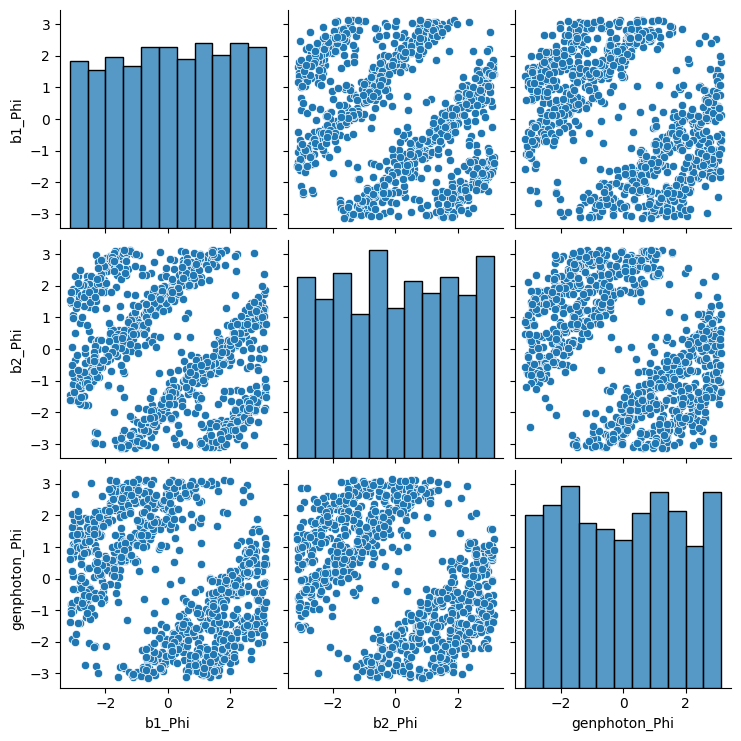

In [7]:
sns.pairplot(data=signal) 

<Axes: >

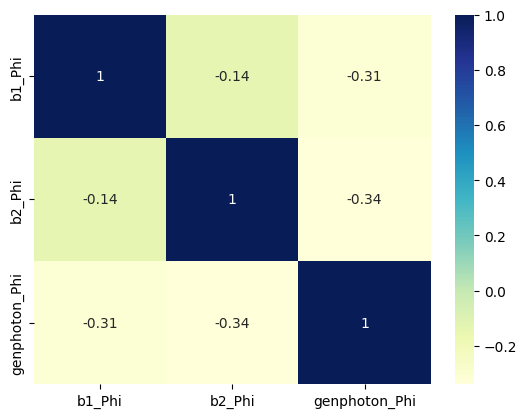

In [8]:
# CORRELATION MATRIX 
sns.heatmap(signal.corr(), annot = True, cmap="YlGnBu")

#### BACKGROUND ORIGINAL DATA

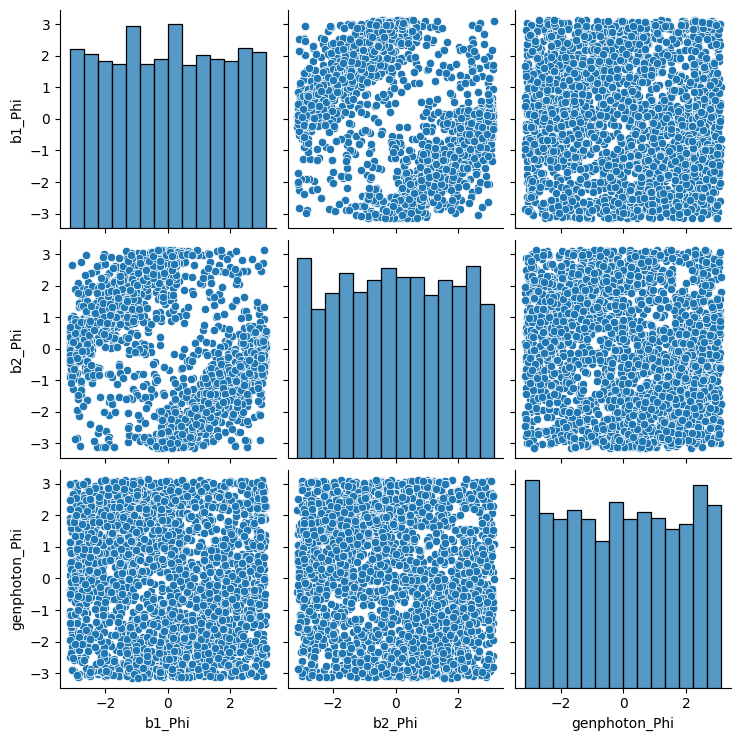

In [9]:
sns.pairplot(data=background) 

#### BACKGROUND - SAMPLED DATA

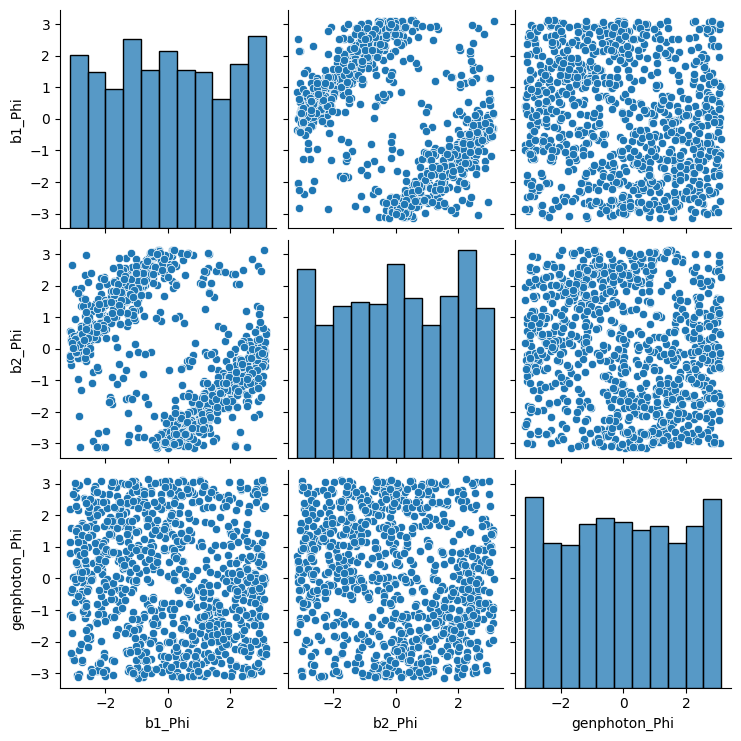

In [10]:
background_minimized = background.sample(n = len(signal))
sns.pairplot(data=background_minimized) 

<Axes: >

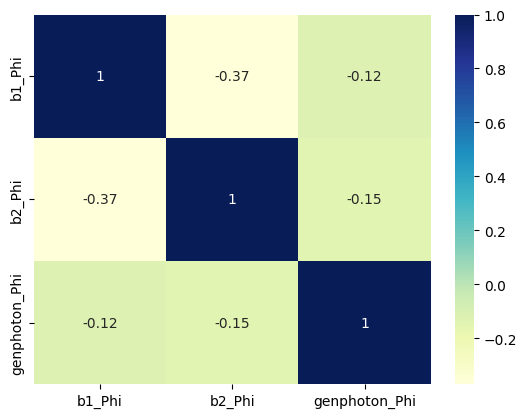

In [11]:
sns.heatmap(background.corr(), annot = True, cmap="YlGnBu")

### DIFFERENCES BETWEEN PHI's

In [12]:
def del_phi(x1: pd.Series, x2: pd.Series):
    x = x1 - x2
    x_transform = x.apply(lambda x: np.abs(2*np.pi - np.abs(x)) if np.abs(x) > np.pi else np.abs(x)) 
    return x_transform

In [13]:
def dels(df:pd.DataFrame):
    df['del_b1_b2'] = del_phi(df['b1_Phi'], df['b2_Phi'])
    df['del_b1_gen'] = del_phi(df['b1_Phi'], df['genphoton_Phi'])
    df['del_b2_gen'] = del_phi(df['b2_Phi'], df['genphoton_Phi'])
    return df.iloc[:, 3:] 

In [14]:
signal_updated = dels(signal.copy())
background_updated = dels(background.copy()) 

#### FOR SIGNAL

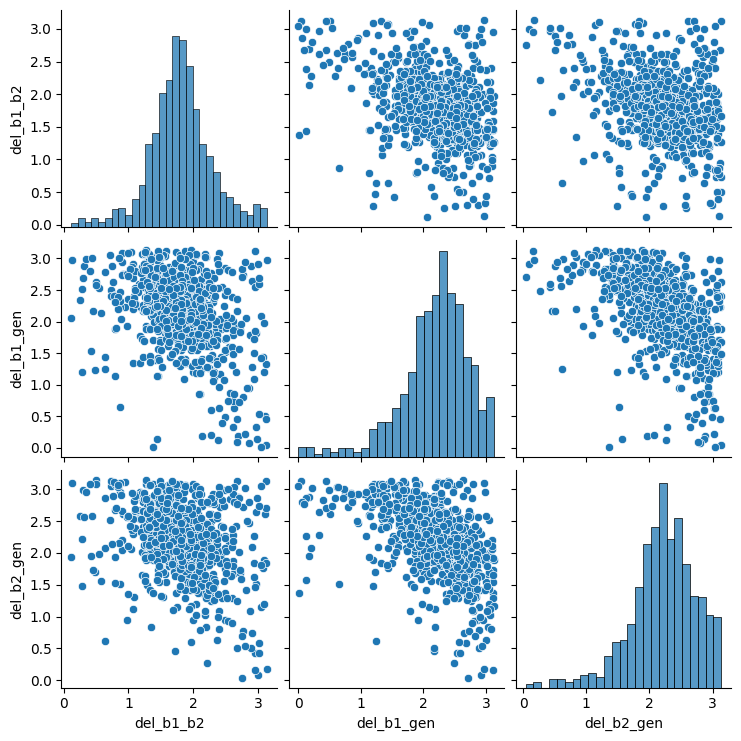

In [15]:
sns.pairplot(data=signal_updated)

<Axes: >

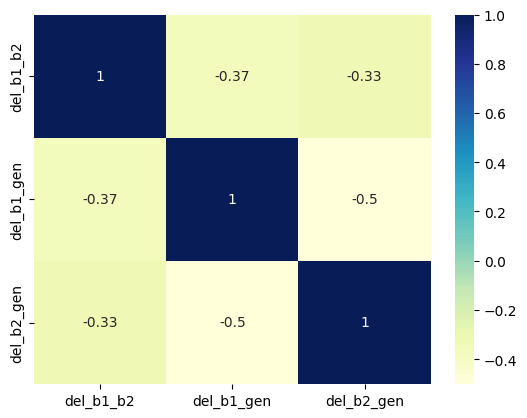

In [16]:
sns.heatmap(signal_updated.corr(), annot = True, cmap="YlGnBu") 

#### FOR BACKGROUND

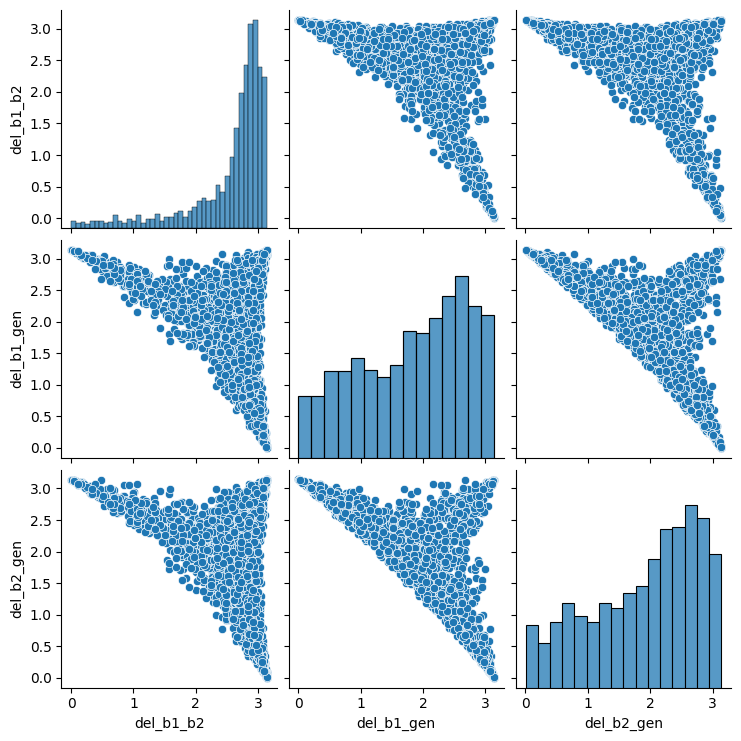

In [17]:
sns.pairplot(data=background_updated) 

<Axes: >

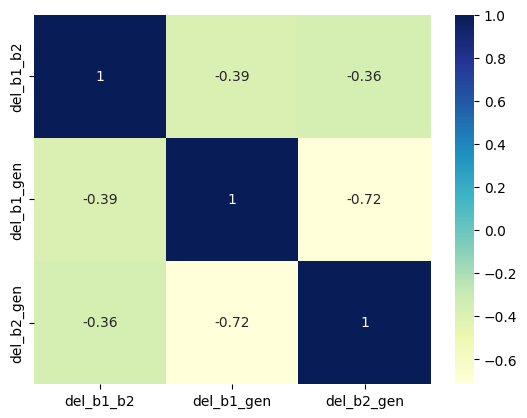

In [18]:
sns.heatmap(background_updated.corr(), annot=True, cmap='YlGnBu')

#### FOR BACKGROUND - SAMPLED

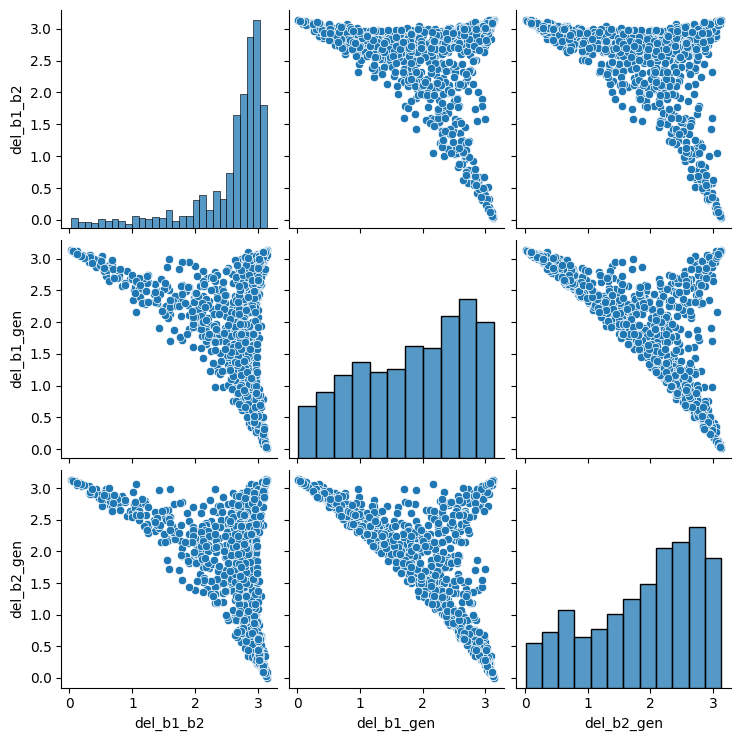

In [19]:
background_updated_minimized = background_updated.sample(n = len(signal))
sns.pairplot(data=background_updated_minimized) 